Accuracy: 0.7475
Precision: 0.1530
Recall: 0.8113
F1 Score: 0.2575


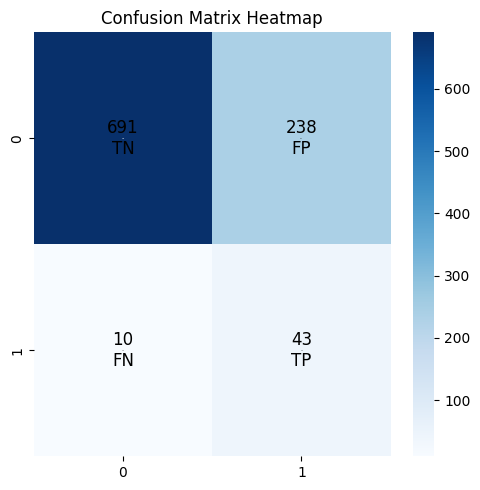

ValueError: too many values to unpack (expected 4)

In [18]:
import numpy as np
from metrics_module import metrics
from graphs_module import plot_roc_auc

# Carregar les prediccions de cada model des de la carpeta 'predictions'
predictions_logistic_reg = np.load('predictions/predictions_logistic_reg.npy')
predictions_random_forest = np.load('predictions/predictions_random_forest.npy')
predictions_naive_bayes = np.load('predictions/predictions_naive_bayes.npy')
predictions_knn = np.load('predictions/predictions_knn.npy')
predictions_adaboost = np.load('predictions/predictions_adaboost.npy')
predictions_xgboost = np.load('predictions/predictions_xgboost.npy')

# Carregar les etiquetes reals des de la carpeta 'predictions'
y_test = np.load('predictions/y_test.npy')

# Combinar les prediccions utilitzant votació majoritària
combined_predictions = np.round((predictions_logistic_reg + predictions_random_forest + predictions_naive_bayes + predictions_knn + predictions_adaboost + predictions_xgboost) / 6).astype(int)

# Guardar les prediccions en un fitxer .npy
np.save('predictions/predictions_ensemble.npy', combined_predictions)

# Avaluar el model
accuracy, precision, recall, f1 = metrics(y_test, combined_predictions, print_metrics=True)